# <font color='orange'>Catégorisez automatiquement des questions</font>

Mettre en œuvre une approche purement supervisée et comparer les résultats avec l’approche non supervisée.

Plusieurs méthodes d’extraction de features seront testées et comparées, au minimum :
une approche de type bag-of-words ;
3 approches de Word/Sentence Embedding : Word2Vec (ou Doc2Vec, Glove…), BERT et USE.

En plus des mesures et scores techniques, mettre en place une méthode d’évaluation propre au contexte et identique pour chaque type de modélisation (du type taux de couverture des tags), avec une séparation du jeu de données pour l’évaluation.

Un notebook de mise en oeuvre d’une approche supervisée de proposition de tags (non cleané, pour comprendre votre démarche), intégrant via MLFlow le tracking d’expérimentations et le stockage centralisé des modèles 

##  <font color='navy'>Sommaire

**Partie 1 : Construction du Bag-of-words**
- <a href="http://localhost:8888/notebooks/OCR%20-%20IML/P5%20-%20Cat%C3%A9gorisez%20automatiquement%20des%20questions/Jouvin_Flavie_1_notebook_exploration_052024.ipynb?#C15#C1">Récupération des données</a>
- <a href="http://localhost:8888/notebooks/OCR%20-%20IML/P5%20-%20Cat%C3%A9gorisez%20automatiquement%20des%20questions/Jouvin_Flavie_1_notebook_exploration_052024.ipynb?#C15#C5">Nettoyage des données texte</a>
- <a href="http://localhost:8888/notebooks/OCR%20-%20IML/P5%20-%20Cat%C3%A9gorisez%20automatiquement%20des%20questions/Jouvin_Flavie_1_notebook_exploration_052024.ipynb?#C15#C10">Vectorisation du texte</a>
- <a href="http://localhost:8888/notebooks/OCR%20-%20IML/P5%20-%20Cat%C3%A9gorisez%20automatiquement%20des%20questions/Jouvin_Flavie_1_notebook_exploration_052024.ipynb?#C15#C15">Exploration des données</a>

**Partie 2 : Modelisation non supervisée**
- <a href="#http://localhost:8888/notebooks/OCR%20-%20IML/P5%20-%20Cat%C3%A9gorisez%20automatiquement%20des%20questions/Jouvin_Flavie_3_notebook_approche_non_supervis%C3%A9e_052024.ipynb?C1">Préparation des données.</a>
    - <a href="http://localhost:8888/notebooks/OCR%20-%20IML/P5%20-%20Cat%C3%A9gorisez%20automatiquement%20des%20questions/Jouvin_Flavie_3_notebook_approche_non_supervis%C3%A9e_052024.ipynb?#C11"> Transformation des données pour BoW</a>
    - <a href="http://localhost:8888/notebooks/OCR%20-%20IML/P5%20-%20Cat%C3%A9gorisez%20automatiquement%20des%20questions/Jouvin_Flavie_3_notebook_approche_non_supervis%C3%A9e_052024.ipynb?#C12"> Transformation des données pour Tf-idf</a>
- <a href="http://localhost:8888/notebooks/OCR%20-%20IML/P5%20-%20Cat%C3%A9gorisez%20automatiquement%20des%20questions/Jouvin_Flavie_3_notebook_approche_non_supervis%C3%A9e_052024.ipynb?#C5">LDA</a>
    - <a href="http://localhost:8888/notebooks/OCR%20-%20IML/P5%20-%20Cat%C3%A9gorisez%20automatiquement%20des%20questions/Jouvin_Flavie_3_notebook_approche_non_supervis%C3%A9e_052024.ipynb?#C51"> LDA + BoW</a>
    - <a href="http://localhost:8888/notebooks/OCR%20-%20IML/P5%20-%20Cat%C3%A9gorisez%20automatiquement%20des%20questions/Jouvin_Flavie_3_notebook_approche_non_supervis%C3%A9e_052024.ipynb?#C52"> LDA + Tf-idf</a>
    - <a href="http://localhost:8888/notebooks/OCR%20-%20IML/P5%20-%20Cat%C3%A9gorisez%20automatiquement%20des%20questions/Jouvin_Flavie_3_notebook_approche_non_supervis%C3%A9e_052024.ipynb?#C53"> Visualisation avec LDAvis</a>

**Partie 3 : Modelisation supervisée**
- <a href="#C1">Extraction de features</a>
- <a href="#C5">Modélisation</a>
    - <a href="#C51">Regression Logistique</a>
    - <a href="#C52">SVM</a>
    - <a href="#C53">XGBoost</a>

3. Modélisation :
- Choisissez un modèle adapté pour la classification multi-étiquette, tel que des modèles de régression logistique multi-étiquette, des Random Forests, des SVMs, ou des réseaux de neurones (LSTM, GRU, transformers).
- Entraînement et validation : Divisez les données en ensembles d'entraînement et de validation, entraînez le modèle et évaluez sa performance à l'aide de métriques adaptées aux classifications multi-étiquettes comme le F1 score, la précision, le rappel, etc.

4. Évaluation et amélioration :
- Ajustement des hyperparamètres : Utilisez la validation croisée et des techniques d'optimisation pour ajuster les hyperparamètres de votre modèle.- 
- Évaluation du modèle : Évaluez le modèle sur un ensemble de test indépendant pour vérifier sa performance réelle
  
5. Déploiement :
- Pipeline de prédiction : Créez un pipeline complet qui prend une nouvelle question, pré-traite le texte, applique le modèle et renvoie les tags prédits.
- Interface utilisateur : Développez une interface utilisateur pour permettre l'utilisation du modèle par des non-techniciens.

# <font color='navy'>PARTIE 3 - Modélisation supervisée</font>

Pour visualiser les expérimentations et les résultats, il est possible de lancer l'interface utilisateur de MLflow dans le terminal avec la commande <font color = 'green'>mlflow ui.

#### <font color='orange'>**Import des librairies python.**</font>

In [3]:
import numpy as np
import pandas as pd
import pickle
#import torch
import time

import mlflow
import mlflow.sklearn
#from mlflow import log_metric, log_param, log_artifact

from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss, coverage_error, make_scorer, accuracy_score
#from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.pipeline import Pipeline

#from scipy.stats import loguniform

#from gensim.models import Word2Vec
#from gensim.models import KeyedVectors
#from transformers import BertTokenizer, BertModel

#import tensorflow_hub as hub
#import tensorflow as tf
#tf.compat.v1.losses.sparse_softmax_cross_entropy

In [4]:
# Import des données.
df = pd.read_json('cleaned_df_final.json', orient='records', lines=True, chunksize=1000)
df = pd.concat(df)
df.head()

,text,tags_cleaned,sentence_bow_lem,sentence_bow,sentence_dl
0,What is the best way to handle the background ...,"[machine-learning, pytorch, tensorflow, deep-l...",best way handle background pixel class trainin...,best way handle background pixel classes train...,what is the best way to handle the background ...
1,How can I serve my django website from multipl...,[django],serve django website multiple machine make dis...,serve django website multiple machines make di...,how can i serve my django website from multipl...
2,Does HTML's 'onclick' work on mobile devices? ...,"[html, javascript, ios]",html work mobile device html onclick attribute...,html work mobile devices html onclick attribut...,does html work on mobile devices does the html...
3,How to center an image in React Native Backgro...,"[react-native, javascript]",center image react native background image mea...,center image react native background image mea...,how to center an image in react native backgro...
4,Module not found: Can't resolve 'style' I am t...,"[reactjs, javascript, webpack]",module found ca resolve trying configure cs mo...,module found ca resolve trying configure css m...,module not found can not resolve i am trying t...


In [5]:
# Calcul du taux de couverture des tags.
def tag_coverage(y_true, y_pred):
    # Compte le nombre de documents où au moins un tag prédit est correct.
    covered_docs = sum(
        1 for y_t, y_p in zip(y_true, y_pred)
        if len(set(np.where(y_p == 1)[0]).intersection(np.where(y_t == 1)[0])) > 0
    )
    # Calcul du pourcentage de couverture.
    return (covered_docs / len(y_true)) * 100

## <a name="C1"><font color='navy'>Extraction de features.</font></a>

**TF-IDF**

In [8]:
# Chargement des données sauvegardées pour TF-IDF.
with open('tfidf_matrix_sparse.pkl', 'rb') as f:
    tfidf_matrix = pickle.load(f)

# Chargement des étiquettes.
with open('tags_binarized.pkl', 'rb') as f:
    y = pickle.load(f)

# Division des données en ensemble d'entraînement et de test.
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

In [9]:
# Vérification de la taille des données chargées.
print(f"Shape of tfidf_matrix: {tfidf_matrix.shape}")
print(f"Shape of y: {y.shape}")

Shape of tfidf_matrix: (48155, 1000)
Shape of y: (48155, 200)


**Word2Vec**

In [11]:
# Chargement de la matrice Word2Vec
with open('word2vec_matrix.pkl', 'rb') as f:
    word2vec_matrix = pickle.load(f)

# Division des données en ensembles d'entraînement et de test
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(word2vec_matrix, y, test_size=0.2, random_state=42)

In [12]:
# Vérification de la taille des données chargées.
print(f"Shape of tfidf_matrix: {word2vec_matrix.shape}")
print(f"Shape of y: {y.shape}")

Shape of tfidf_matrix: (48155, 100)
Shape of y: (48155, 200)


**BERT**

In [14]:
# Chargement de la matrice BERT
with open('bert_matrix.pkl', 'rb') as f:
    bert_matrix = pickle.load(f)

# Division en ensembles d'entraînement et de test
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(bert_matrix, y, test_size=0.2, random_state=42)

In [15]:
# Vérification des dimensions.
print(f"BERT train shape: {X_train_bert.shape}")
print(f"BERT test shape: {X_test_bert.shape}")

BERT train shape: (38524, 384)
BERT test shape: (9631, 384)


**USE**

In [17]:
# Chargement de la matrice USE
with open('use_matrix.pkl', 'rb') as f:
    use_matrix = pickle.load(f)

# Division en ensembles d'entraînement et de test
X_train_use, X_test_use, y_train_use, y_test_use = train_test_split(use_matrix, y, test_size=0.2, random_state=42)

# Vérification des dimensions
print(f"USE train shape: {X_train_use.shape}")
print(f"USE test shape: {X_test_use.shape}")

USE train shape: (38524, 512)
USE test shape: (9631, 512)


## <a name="C5"><font color='navy'>Modelisations.</font></a>

On travaille sur un problème de classification supervisée. Je vais essayer differentes approches de modelisatiosns avec différents embeddings.

Métriques utilisées :
- **Hamming Loss** : Le Hamming Loss mesure la proportion de labels incorrects parmi l'ensemble des labels (tags). Plus la valeur est faible, mieux c'est (idéalement proche de 0).
  
- **F1 Score Micro**
La formule pour le F1 Score micro est la même que pour le F1 Score standard :

​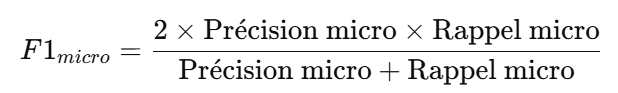
 
La différence est que Précision micro et Rappel micro sont calculés globalement sur tous les tags et toutes les prédictions, comme suit :

    - Précision micro : Combien de prédictions globalement correctes sont faites (correspond au nombre total de vrais positifs (True Positives) divisé par le nombre total de prédictions faites (vrais positifs + faux positifs)).
    - Rappel micro : Combien de tags réellement corrects ont été trouvés (correspond au nombre total de vrais positifs divisé par le nombre total de vrais tags (vrais positifs + faux négatifs)).


**Taux de couverture des tags** : mesure la proportion de documents pour lesquels le modèle a correctement prédit au moins un tag parmi les tags réels, exprimé en pourcentage du nombre total de documents.

#### <a name="C51"><font color='orange'>**Regression Logistique**</font></a>

In [29]:
# Initialisation du modèle de régression logistique dans une stratégie OneVsRest.
rl_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='liblinear'))

**TF-IDF**

In [31]:
# Regression log avec TF-IDF.
# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour Logistic Regression avec TF-IDF.
with mlflow.start_run(run_name="LogisticRegression_TFIDF"):
    # Entraînement du modèle
    start_train_time = time.time()
    
    # Choix du model à utiliser.
    model = rl_model
    X_train = X_train_tfidf
    X_test = X_test_tfidf
    y_train = y_train_tfidf
    y_test = y_test_tfidf
    
    # Enregistrement des hyperparamètres du modèle
    max_iter = 100  # Exemple d'hyperparamètre, modifiez-le selon votre modèle
    model.max_iter = max_iter  # Si applicable
    mlflow.log_param("max_iter", max_iter)  # Enregistrement de l'hyperparamètre

    model.fit(X_train, y_train)

    # Calcul de la durée de prédiction.
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques.
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle.
    mlflow.sklearn.log_model(model, "LogisticRegression_TFIDF",
                             registered_model_name="LogisticRegression_TFIDF")
    
    # Ajout de tags pour faciliter la gestion des runs
    mlflow.set_tags({
        "project": "Text Classification",
        "version": "v1.0",
        "data_source": "TF-IDF"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\_distutils_hack\__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Successfully registered model 'LogisticRegression_TFIDF'.
Created version '1' of model 'LogisticRegression_TFIDF'.
2024/10/27 15:31:04 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.782142253759081
Accuracy: 0.11224171944761707
F1 Score: 0.5072312917716665
Recall: 0.3753141467369274
Hamming Loss: 0.009339632436922438
Tag Coverage: 64.4689025023362
Training Duration (sec): 36.29065990447998
Prediction Duration (sec): 0.15708541870117188


**TF-IDF - Ajustement des hyperparamètres.**

In [54]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_tfidf, y_train_tfidf, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres à tester pour la recherche d'optimisation.
param_grid = {
        'estimator__C': [0.01, 0.1, 1, 10, 100],
        'estimator__solver': ['liblinear', 'saga'],
        'estimator__penalty': ['l2'],
}

# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Recherche des meilleurs hyperparamètres.
with mlflow.start_run(run_name="GridSearch_LogisticRegression_TFIDF"):
    grid_search = GridSearchCV(estimator=rl_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=1, verbose=1)
    
    # Entraînement de GridSearchCV.
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres.
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)  # Enregistrement des meilleurs hyperparamètres dans MLflow.
    mlflow.log_metric("best_score", random_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres.
with mlflow.start_run(run_name="LogisticRegression_TFIDF_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'.
    logistic_params = {
        'C': best_params['estimator__C'],
        'solver': best_params['estimator__solver'],
        'penalty': best_params['estimator__penalty'],
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(LogisticRegression(**logistic_params, max_iter=500))

    # Calcul du temps d’entraînement.
    start_train_time = time.time()
    final_model.fit(X_train_tfidf, y_train_tfidf)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction.
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_tfidf)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance.
    precision = precision_score(y_test_tfidf, y_pred, average='micro')
    accuracy = accuracy_score(y_test_tfidf, y_pred)
    f1 = f1_score(y_test_tfidf, y_pred, average='micro')
    recall = recall_score(y_test_tfidf, y_pred, average='micro')
    hamming = hamming_loss(y_test_tfidf, y_pred)
    coverage = tag_coverage(y_test_tfidf, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow.
    mlflow.sklearn.log_model(final_model, "LogisticRegression_TFIDF_BestParams",
                            registered_model_name="LogisticRegression_TFIDF_BestParams")

# Affichage des résultats.
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jouvi\anaconda3\env

Meilleurs hyperparamètres : {'estimator__C': 0.1, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}


Successfully registered model 'LogisticRegression_TFIDF_BestParams'.
Created version '1' of model 'LogisticRegression_TFIDF_BestParams'.
2024/10/27 17:19:14 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.8369107744107744
Accuracy: 0.04433599833869795
F1 Score: 0.270341921011488
Recall: 0.16120794487231455
Hamming Loss: 0.011145260097601495
Tag Coverage: 34.409718616966046
Training Duration (sec): 24.258811235427856
Prediction Duration (sec): 0.17251133918762207


**Word2Vec**

In [56]:
# Logistic Regression avec Word2Vec.

# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour Logistic Regression avec Word2Vec.
with mlflow.start_run(run_name="LogisticRegression_W2V"):
    # Entraînement du modèle
    start_train_time = time.time()
    
    # Choix du model à utiliser.
    model = rl_model
    X_train = X_train_w2v
    X_test = X_test_w2v
    y_train = y_train_w2v
    y_test = y_test_w2v
    
    # Enregistrement des hyperparamètres du modèle
    max_iter = 100  # Exemple d'hyperparamètre, modifiez-le selon votre modèle
    model.max_iter = max_iter  # Si applicable
    mlflow.log_param("max_iter", max_iter)  # Enregistrement de l'hyperparamètre

    model.fit(X_train, y_train)

    # Calcul de la durée de prédiction.
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques.
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle.
    mlflow.sklearn.log_model(model, "LogisticRegression_W2V",
                             registered_model_name="LogisticRegression_W2V")
    
    # Ajout de tags pour faciliter la gestion des runs
    mlflow.set_tags({
        "project": "Text Classification",
        "version": "v1.0",
        "data_source": "W2V"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Successfully registered model 'LogisticRegression_W2V'.
Created version '1' of model 'LogisticRegression_W2V'.
2024/10/27 18:09:03 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.688622754491018
Accuracy: 0.09822448343889524
F1 Score: 0.4798880173256213
Recall: 0.368261045804621
Hamming Loss: 0.010223756619250337
Tag Coverage: 62.568788287820574
Training Duration (sec): 197.58147382736206
Prediction Duration (sec): 0.8811471462249756


**Word2Vec - Ajustement des hyperparamètres.**

In [59]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_w2v, y_train_w2v, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres à tester pour la recherche d'optimisation.
param_grid = {
        'estimator__C': [0.01, 0.1, 1, 10, 100],
        'estimator__solver': ['liblinear', 'saga'],
        'estimator__penalty': ['l2'],
}

# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Recherche des meilleurs hyperparamètres.
with mlflow.start_run(run_name="GridSearch_LogisticRegression_W2V"):
    grid_search = GridSearchCV(estimator=rl_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=1, verbose=1)
    
    # Entraînement de GridSearchCV.
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres.
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)  # Enregistrement des meilleurs hyperparamètres dans MLflow.
    mlflow.log_metric("best_score", random_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres.
with mlflow.start_run(run_name="LogisticRegression_W2V_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'.
    logistic_params = {
        'C': best_params['estimator__C'],
        'solver': best_params['estimator__solver'],
        'penalty': best_params['estimator__penalty'],
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(LogisticRegression(**logistic_params, max_iter=500))

    # Calcul du temps d’entraînement.
    start_train_time = time.time()
    final_model.fit(X_train_w2v, y_train_w2v)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction.
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_w2v)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance.
    precision = precision_score(y_test_w2v, y_pred, average='micro')
    accuracy = accuracy_score(y_test_w2v, y_pred)
    f1 = f1_score(y_test_w2v, y_pred, average='micro')
    recall = recall_score(y_test_w2v, y_pred, average='micro')
    hamming = hamming_loss(y_test_w2v, y_pred)
    coverage = tag_coverage(y_test_w2v, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow.
    mlflow.sklearn.log_model(final_model, "LogisticRegression_W2V_BestParams",
                            registered_model_name="LogisticRegression_W2V_BestParams")

# Affichage des résultats.
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-pack

Meilleurs hyperparamètres : {'estimator__C': 0.01, 'estimator__penalty': 'l2', 'estimator__solver': 'saga'}


Successfully registered model 'LogisticRegression_W2V_BestParams'.
Created version '1' of model 'LogisticRegression_W2V_BestParams'.
2024/10/28 11:27:08 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.7273233166388425
Accuracy: 0.05035821825355623
F1 Score: 0.32820641597087075
Recall: 0.21191730847182813
Hamming Loss: 0.011110995742913509
Tag Coverage: 41.231440141210676
Training Duration (sec): 828.8868937492371
Prediction Duration (sec): 0.42845892906188965


**BERT**

In [61]:
# Logistic Regression avec BERT.

# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour Logistic Regression avec BERT.
with mlflow.start_run(run_name="LogisticRegression_BERT"):
    # Entraînement du modèle
    start_train_time = time.time()
    
    # Choix du model à utiliser.
    model = rl_model
    X_train = X_train_bert
    X_test = X_test_bert
    y_train = y_train_bert
    y_test = y_test_bert
    
    # Enregistrement des hyperparamètres du modèle
    max_iter = 100 
    model.max_iter = max_iter
    mlflow.log_param("max_iter", max_iter)

    model.fit(X_train, y_train)

    # Calcul de la durée de prédiction.
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques.
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle.
    mlflow.sklearn.log_model(model, "LogisticRegression_BERT",
                             registered_model_name="LogisticRegression_BERT")
    
    # Ajout de tags pour faciliter la gestion des runs
    mlflow.set_tags({
        "project": "Text Classification",
        "version": "v1.0",
        "data_source": "BERT"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Successfully registered model 'LogisticRegression_BERT'.
Created version '1' of model 'LogisticRegression_BERT'.
2024/10/28 11:32:55 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.7883274115015133
Accuracy: 0.16467656525802096
F1 Score: 0.6010334102538377
Recall: 0.485650587758411
Hamming Loss: 0.008257709479804797
Tag Coverage: 77.73855259059287
Training Duration (sec): 338.14429116249084
Prediction Duration (sec): 3.2954788208007812


**BERT - Ajustement des hyperparamètres.**

In [63]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_bert, y_train_bert, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres à tester pour la recherche d'optimisation.
param_grid = {
        'estimator__C': [0.01, 0.1, 1, 10, 100],
        'estimator__solver': ['liblinear', 'saga'],
        'estimator__penalty': ['l2'],
}

# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Recherche des meilleurs hyperparamètres.
with mlflow.start_run(run_name="GridSearch_LogisticRegression_BERT"):
    grid_search = GridSearchCV(estimator=rl_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=1, verbose=1)
    
    # Entraînement de GridSearchCV.
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres.
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)  # Enregistrement des meilleurs hyperparamètres dans MLflow.
    mlflow.log_metric("best_score", random_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres.
with mlflow.start_run(run_name="LogisticRegression_BERT_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'.
    logistic_params = {
        'C': best_params['estimator__C'],
        'solver': best_params['estimator__solver'],
        'penalty': best_params['estimator__penalty'],
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(LogisticRegression(**logistic_params, max_iter=500))

    # Calcul du temps d’entraînement.
    start_train_time = time.time()
    final_model.fit(X_train_bert, y_train_bert)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction.
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_bert)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance.
    precision = precision_score(y_test_bert, y_pred, average='micro')
    accuracy = accuracy_score(y_test_bert, y_pred)
    f1 = f1_score(y_test_bert, y_pred, average='micro')
    recall = recall_score(y_test_bert, y_pred, average='micro')
    hamming = hamming_loss(y_test_bert, y_pred)
    coverage = tag_coverage(y_test_bert, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow.
    mlflow.sklearn.log_model(final_model, "LogisticRegression_BERT_BestParams",
                            registered_model_name="LogisticRegression_BERT_BestParams")

# Affichage des résultats.
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jouvi\anaconda3\env

Meilleurs hyperparamètres : {'estimator__C': 0.1, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}


Successfully registered model 'LogisticRegression_BERT_BestParams'.
Created version '1' of model 'LogisticRegression_BERT_BestParams'.
2024/10/28 17:11:16 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.8279836410955509
Accuracy: 0.0809884747170595
F1 Score: 0.40813708421149086
Recall: 0.27081475476286987
Hamming Loss: 0.010059703042259371
Tag Coverage: 55.196760461011316
Training Duration (sec): 224.402485370636
Prediction Duration (sec): 3.037877082824707


**USE**

In [65]:
# Logistic Regression avec USE.

# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour Logistic Regression avec USE.
with mlflow.start_run(run_name="LogisticRegression_USE"):
    # Entraînement du modèle.
    start_train_time = time.time()
    
    # Choix du model à utiliser.
    model = rl_model
    X_train = X_train_use
    X_test = X_test_use
    y_train = y_train_use
    y_test = y_test_use
    
    # Enregistrement des hyperparamètres du modèle.
    max_iter = 100 
    model.max_iter = max_iter
    mlflow.log_param("max_iter", max_iter)

    model.fit(X_train, y_train)

    # Calcul de la durée de prédiction.
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques.
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle.
    mlflow.sklearn.log_model(model, "LogisticRegression_USE",
                             registered_model_name="LogisticRegression_USE")
    
    # Ajout de tags pour faciliter la gestion des runs.
    mlflow.set_tags({
        "project": "Text Classification",
        "version": "v1.0",
        "data_source": "USE"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Successfully registered model 'LogisticRegression_USE'.
Created version '1' of model 'LogisticRegression_USE'.
2024/10/28 17:19:03 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.7747456806071371
Accuracy: 0.13051604194787664
F1 Score: 0.5179188255613126
Recall: 0.3889744629104175
Hamming Loss: 0.009274218668881735
Tag Coverage: 69.02709998961686
Training Duration (sec): 456.77484226226807
Prediction Duration (sec): 4.317511796951294


**USE - Ajustement des hyperparamètres.**

In [67]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_use, y_train_use, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres à tester pour la recherche d'optimisation.
param_grid = {
        'estimator__C': [0.01, 0.1, 1, 10, 100],
        'estimator__solver': ['liblinear', 'saga'],
        'estimator__penalty': ['l2'],
}

# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Recherche des meilleurs hyperparamètres.
with mlflow.start_run(run_name="GridSearch_LogisticRegression_USE"):
    grid_search = GridSearchCV(estimator=rl_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=1, verbose=1)
    
    # Entraînement de GridSearchCV.
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres.
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)  # Enregistrement des meilleurs hyperparamètres dans MLflow.
    mlflow.log_metric("best_score", random_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres.
with mlflow.start_run(run_name="LogisticRegression_USE_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'.
    logistic_params = {
        'C': best_params['estimator__C'],
        'solver': best_params['estimator__solver'],
        'penalty': best_params['estimator__penalty'],
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(LogisticRegression(**logistic_params, max_iter=500))

    # Calcul du temps d’entraînement.
    start_train_time = time.time()
    final_model.fit(X_train_use, y_train_use)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction.
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_use)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance.
    precision = precision_score(y_test_use, y_pred, average='micro')
    accuracy = accuracy_score(y_test_use, y_pred)
    f1 = f1_score(y_test_use, y_pred, average='micro')
    recall = recall_score(y_test_use, y_pred, average='micro')
    hamming = hamming_loss(y_test_use, y_pred)
    coverage = tag_coverage(y_test_use, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow.
    mlflow.sklearn.log_model(final_model, "LogisticRegression_USE_BestParams",
                            registered_model_name="LogisticRegression_USE_BestParams")

# Affichage des résultats.
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jouvi\anaconda3\env

Meilleurs hyperparamètres : {'estimator__C': 0.1, 'estimator__penalty': 'l2', 'estimator__solver': 'saga'}


Successfully registered model 'LogisticRegression_USE_BestParams'.
Created version '1' of model 'LogisticRegression_USE_BestParams'.
2024/10/28 20:55:32 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.814766201804758
Accuracy: 0.06250648946111514
F1 Score: 0.3228343897285877
Recall: 0.20129712201053912
Hamming Loss: 0.010815595472951927
Tag Coverage: 44.30484892534524
Training Duration (sec): 545.9006514549255
Prediction Duration (sec): 2.032797336578369


#### <a name="C51"><font color='orange'>**SVM**</font></a>

In [86]:
# Initialisation du modèle SVM dans une stratégie OneVsRest.
svm_model = OneVsRestClassifier(LinearSVC(max_iter=1000))

**TFIDF**

In [89]:
# SVM avec TF-IDF.
# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour Logistic Regression avec TF-IDF.
with mlflow.start_run(run_name="SVM_TFIDF"):
    # Entraînement du modèle
    start_train_time = time.time()
    
    # Choix du model à utiliser.
    model = svm_model
    X_train = X_train_tfidf
    X_test = X_test_tfidf
    y_train = y_train_tfidf
    y_test = y_test_tfidf
    
    # Enregistrement des hyperparamètres du modèle
    max_iter = 100  # Exemple d'hyperparamètre, modifiez-le selon votre modèle
    model.max_iter = max_iter  # Si applicable
    mlflow.log_param("max_iter", max_iter)  # Enregistrement de l'hyperparamètre

    model.fit(X_train, y_train)

    # Calcul de la durée de prédiction.
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques.
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle.
    mlflow.sklearn.log_model(model, "SVM_TFIDF",
                             registered_model_name="SVM_TFIDF")
    
    # Ajout de tags pour faciliter la gestion des runs
    mlflow.set_tags({
        "project": "Text Classification SVM",
        "version": "v1.0",
        "data_source": "TF-IDF"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Successfully registered model 'SVM_TFIDF'.
Created version '1' of model 'SVM_TFIDF'.
2024/10/28 22:58:51 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.764529198100028
Accuracy: 0.13570761083999586
F1 Score: 0.5614836095008464
Recall: 0.44365626266720715
Hamming Loss: 0.008875506177966981
Tag Coverage: 72.60928252517911
Training Duration (sec): 29.344250202178955
Prediction Duration (sec): 0.20613503456115723


**TF-IDF - Ajustement des hyperparamètres.**

In [107]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_tfidf, y_train_tfidf, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres à tester pour le modèle SVM.
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__loss': ['hinge', 'squared_hinge'],
}

# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Recherche des meilleurs hyperparamètres.
with mlflow.start_run(run_name="GridSearch_SVM_TFIDF"):
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=-1, verbose=1)
    
    # Entraînement de GridSearchCV.
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres.
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)  # Enregistrement des meilleurs hyperparamètres dans MLflow.
    mlflow.log_metric("best_score", grid_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres.
with mlflow.start_run(run_name="SVM_TFIDF_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'.
    svm_params = {
        'C': best_params['estimator__C'],
        'loss': best_params['estimator__loss'],
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(LinearSVC(**svm_params, max_iter=1000))

    # Calcul du temps d’entraînement.
    start_train_time = time.time()
    final_model.fit(X_train_tfidf, y_train_tfidf)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction.
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_tfidf)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance.
    precision = precision_score(y_test_tfidf, y_pred, average='micro')
    accuracy = accuracy_score(y_test_tfidf, y_pred)
    f1 = f1_score(y_test_tfidf, y_pred, average='micro')
    recall = recall_score(y_test_tfidf, y_pred, average='micro')
    hamming = hamming_loss(y_test_tfidf, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow.
    mlflow.sklearn.log_model(final_model, "SVM_TFIDF_BestParams",
                            registered_model_name="SVM_TFIDF_BestParams")

# Affichage des résultats.
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs hyperparamètres : {'estimator__C': 0.01, 'estimator__loss': 'squared_hinge'}


Registered model 'SVM_TFIDF_BestParams' already exists. Creating a new version of this model...
Created version '2' of model 'SVM_TFIDF_BestParams'.
2024/10/29 08:05:30 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.851018010963195
Accuracy: 0.05046204963139861
F1 Score: 0.2919605077574048
Recall: 0.17620591811917308
Hamming Loss: 0.010945903852144117
Tag Coverage: 75.04931990447513
Training Duration (sec): 31.284662008285522
Prediction Duration (sec): 0.15766572952270508


**Word2Vec**

In [93]:
# SVM avec Word2Vec.
# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour Logistic Regression avec TF-IDF.
with mlflow.start_run(run_name="SVM_W2V"):
    # Entraînement du modèle
    start_train_time = time.time()
    
    # Choix du model à utiliser.
    model = svm_model
    X_train = X_train_w2v
    X_test = X_test_w2v
    y_train = y_train_w2v
    y_test = y_test_w2v
    
    # Enregistrement des hyperparamètres du modèle
    max_iter = 100
    model.max_iter = max_iter
    mlflow.log_param("max_iter", max_iter)  # Enregistrement de l'hyperparamètre

    model.fit(X_train, y_train)

    # Calcul de la durée de prédiction.
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques.
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle.
    mlflow.sklearn.log_model(model, "SVM_W2V",
                             registered_model_name="SVM_W2V")
    
    # Ajout de tags pour faciliter la gestion des runs
    mlflow.set_tags({
        "project": "Text Classification SVM",
        "version": "v1.0",
        "data_source": "W2V"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Successfully registered model 'SVM_W2V'.
Created version '1' of model 'SVM_W2V'.
2024/10/28 23:02:01 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.7419879460441978
Accuracy: 0.0893988163222926
F1 Score: 0.44164792301341
Recall: 0.3143899473044183
Hamming Loss: 0.01018118575433496
Tag Coverage: 56.993043297684565
Training Duration (sec): 86.29469656944275
Prediction Duration (sec): 0.8468222618103027


**Word2Vec - Ajustement des hyperparamètres.**

In [108]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_w2v, y_train_w2v, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres à tester pour le modèle SVM.
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__loss': ['hinge', 'squared_hinge'],
}

# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Recherche des meilleurs hyperparamètres.
with mlflow.start_run(run_name="GridSearch_SVM_W2V"):
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=-1, verbose=1)
    
    # Entraînement de GridSearchCV.
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres.
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)  # Enregistrement des meilleurs hyperparamètres dans MLflow.
    mlflow.log_metric("best_score", grid_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres.
with mlflow.start_run(run_name="SVM_W2V_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'.
    svm_params = {
        'C': best_params['estimator__C'],
        'loss': best_params['estimator__loss'],
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(LinearSVC(**svm_params, max_iter=1000))

    # Calcul du temps d’entraînement.
    start_train_time = time.time()
    final_model.fit(X_train_w2v, y_train_w2v)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction.
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_w2v)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance.
    precision = precision_score(y_test_w2v, y_pred, average='micro')
    accuracy = accuracy_score(y_test_w2v, y_pred)
    f1 = f1_score(y_test_w2v, y_pred, average='micro')
    recall = recall_score(y_test_w2v, y_pred, average='micro')
    hamming = hamming_loss(y_test_w2v, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow.
    mlflow.sklearn.log_model(final_model, "SVM_W2V_BestParams",
                            registered_model_name="SVM_W2V_BestParams")

# Affichage des résultats.
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs hyperparamètres : {'estimator__C': 0.01, 'estimator__loss': 'hinge'}


C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jouvi\anaconda3\envs\p8_env\lib\site-packages\sklearn\svm\_base.py:1235

Precision: 0.7905698100633123
Accuracy: 0.052746339943931055
F1 Score: 0.30940271257172663
Recall: 0.19233887312525336
Hamming Loss: 0.010996781227286886
Tag Coverage: 75.04931990447513
Training Duration (sec): 68.64562106132507
Prediction Duration (sec): 1.0322246551513672


**BERT**

In [97]:
# SVM avec BERT.
# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour Logistic Regression avec TF-IDF.
with mlflow.start_run(run_name="SVM_BERT"):
    # Entraînement du modèle
    start_train_time = time.time()
    
    # Choix du model à utiliser.
    model = svm_model
    X_train = X_train_bert
    X_test = X_test_bert
    y_train = y_train_bert
    y_test = y_test_bert
    
    # Enregistrement des hyperparamètres du modèle
    max_iter = 100 
    model.max_iter = max_iter 
    mlflow.log_param("max_iter", max_iter)  # Enregistrement de l'hyperparamètre

    model.fit(X_train, y_train)

    # Calcul de la durée de prédiction.
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques.
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle.
    mlflow.sklearn.log_model(model, "SVM_BERT",
                             registered_model_name="SVM_BERT")
    
    # Ajout de tags pour faciliter la gestion des runs
    mlflow.set_tags({
        "project": "Text Classification SVM",
        "version": "v1.0",
        "data_source": "BERT"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Successfully registered model 'SVM_BERT'.
Created version '1' of model 'SVM_BERT'.
2024/10/28 23:11:22 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.7818546484190656
Accuracy: 0.18886927629529643
F1 Score: 0.6368747297102494
Recall: 0.5372517227401703
Hamming Loss: 0.007846537223548956
Tag Coverage: 82.46288028242135
Training Duration (sec): 185.6857945919037
Prediction Duration (sec): 3.002114772796631


**BERT - Ajustement des hyperparamètres.**

In [109]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_bert, y_train_bert, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres à tester pour le modèle SVM.
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__loss': ['hinge', 'squared_hinge'],
}

# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Recherche des meilleurs hyperparamètres.
with mlflow.start_run(run_name="GridSearch_SVM_BERT"):
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=-1, verbose=1)
    
    # Entraînement de GridSearchCV.
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres.
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)  # Enregistrement des meilleurs hyperparamètres dans MLflow.
    mlflow.log_metric("best_score", grid_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres.
with mlflow.start_run(run_name="SVM_BERT_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'.
    svm_params = {
        'C': best_params['estimator__C'],
        'loss': best_params['estimator__loss'],
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(LinearSVC(**svm_params, max_iter=1000))

    # Calcul du temps d’entraînement.
    start_train_time = time.time()
    final_model.fit(X_train_bert, y_train_bert)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction.
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_bert)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance.
    precision = precision_score(y_test_bert, y_pred, average='micro')
    accuracy = accuracy_score(y_test_bert, y_pred)
    f1 = f1_score(y_test_bert, y_pred, average='micro')
    recall = recall_score(y_test_bert, y_pred, average='micro')
    hamming = hamming_loss(y_test_bert, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow.
    mlflow.sklearn.log_model(final_model, "SVM_BERT_BestParams",
                            registered_model_name="SVM_BERT_BestParams")

# Affichage des résultats.
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs hyperparamètres : {'estimator__C': 0.01, 'estimator__loss': 'hinge'}


Registered model 'SVM_BERT_BestParams' already exists. Creating a new version of this model...
Created version '3' of model 'SVM_BERT_BestParams'.
2024/10/29 08:28:35 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.8770875083500334
Accuracy: 0.03592565673346485
F1 Score: 0.18984962406015038
Recall: 0.10644507498986623
Hamming Loss: 0.011635344201017547
Tag Coverage: 75.04931990447513
Training Duration (sec): 123.58607506752014
Prediction Duration (sec): 3.126035213470459


**USE**

In [102]:
# SVM avec USE.
# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour Logistic Regression avec TF-IDF.
with mlflow.start_run(run_name="SVM_USE"):
    # Entraînement du modèle
    start_train_time = time.time()
    
    # Choix du model à utiliser.
    model = svm_model
    X_train = X_train_use
    X_test = X_test_use
    y_train = y_train_use
    y_test = y_test_use
    
    # Enregistrement des hyperparamètres du modèle
    max_iter = 100 
    model.max_iter = max_iter 
    mlflow.log_param("max_iter", max_iter)  # Enregistrement de l'hyperparamètre

    model.fit(X_train, y_train)

    # Calcul de la durée de prédiction.
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques.
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle.
    mlflow.sklearn.log_model(model, "SVM_USE",
                             registered_model_name="SVM_USE")
    
    # Ajout de tags pour faciliter la gestion des runs
    mlflow.set_tags({
        "project": "Text Classification SVM",
        "version": "v1.0",
        "data_source": "USE"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Successfully registered model 'SVM_USE'.
Created version '1' of model 'SVM_USE'.
2024/10/28 23:36:13 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.7682394366197183
Accuracy: 0.1515938116498806
F1 Score: 0.5613069205042449
Recall: 0.44219700040535065
Hamming Loss: 0.008852663274841657
Tag Coverage: 75.04931990447513
Training Duration (sec): 253.5495846271515
Prediction Duration (sec): 3.9541406631469727


**USE - Ajustement des hyperparamètres.**

In [110]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_use, y_train_use, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres à tester pour le modèle SVM.
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__loss': ['hinge', 'squared_hinge'],
}

# Activation de MLflow.
mlflow.set_tracking_uri("mlruns")

# Recherche des meilleurs hyperparamètres.
with mlflow.start_run(run_name="GridSearch_SVM_USE"):
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=-1, verbose=1)
    
    # Entraînement de GridSearchCV.
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres.
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)  # Enregistrement des meilleurs hyperparamètres dans MLflow.
    mlflow.log_metric("best_score", grid_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres.
with mlflow.start_run(run_name="SVM_USE_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'.
    svm_params = {
        'C': best_params['estimator__C'],
        'loss': best_params['estimator__loss'],
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(LinearSVC(**svm_params, max_iter=1000))

    # Calcul du temps d’entraînement.
    start_train_time = time.time()
    final_model.fit(X_train_use, y_train_use)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction.
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_use)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance.
    precision = precision_score(y_test_use, y_pred, average='micro')
    accuracy = accuracy_score(y_test_use, y_pred)
    f1 = f1_score(y_test_use, y_pred, average='micro')
    recall = recall_score(y_test_use, y_pred, average='micro')
    hamming = hamming_loss(y_test_use, y_pred)

    # Enregistrement des métriques dans MLflow.
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow.
    mlflow.sklearn.log_model(final_model, "SVM_USE_BestParams",
                            registered_model_name="SVM_USE_BestParams")

# Affichage des résultats.
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs hyperparamètres : {'estimator__C': 0.01, 'estimator__loss': 'squared_hinge'}


Registered model 'SVM_USE_BestParams' already exists. Creating a new version of this model...
Created version '2' of model 'SVM_USE_BestParams'.
2024/10/29 09:00:57 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Precision: 0.827887877164792
Accuracy: 0.05970304225937078
F1 Score: 0.3063658286809157
Recall: 0.18796108633968384
Hamming Loss: 0.01090073720278268
Tag Coverage: 75.04931990447513
Training Duration (sec): 737.1645052433014
Prediction Duration (sec): 3.9758524894714355


#### <a name="C53"><font color='orange'>**XGBoost**</font></a>

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
# Initialisation du modèle XGBoost dans une stratégie OneVsRest.
xgb_model = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))

**TF-IDF**

In [ ]:
# Activation de MLflow
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour XGBoost avec TF-IDF.
with mlflow.start_run(run_name="XGBoost_TFIDF"):
    # Entraînement du modèle
    start_train_time = time.time()
    
    # Choix du modèle et des données
    model = xgb_model
    X_train = X_train_tfidf
    X_test = X_test_tfidf
    y_train = y_train_tfidf
    y_test = y_test_tfidf
    
    # Hyperparamètres à enregistrer dans MLflow
    max_depth = 6
    learning_rate = 0.1
    n_estimators = 100
    mlflow.log_params({
        "max_depth": max_depth,
        "learning_rate": learning_rate,
        "n_estimators": n_estimators
    })
    
    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Calcul de la durée de l'entraînement
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow
    mlflow.sklearn.log_model(model, "XGBoost_TFIDF",
                             registered_model_name="XGBoost_TFIDF")
    
    # Ajout de tags pour faciliter la gestion des runs
    mlflow.set_tags({
        "project": "Text Classification XGBoost",
        "version": "v1.0",
        "data_source": "TF-IDF"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

**TF-IDF - Ajustement des hyperparamètres.**

In [ ]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_tfidf, y_train_tfidf, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres pour XGBoost
param_grid = {
    'estimator__max_depth': [3, 6, 10],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__n_estimators': [50, 100, 200]
}

with mlflow.start_run(run_name="GridSearch_XGBoost_TFIDF"):
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=-1, verbose=1)
    
    # Entraînement de GridSearchCV
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres et enregistrement dans MLflow
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)
    mlflow.log_metric("best_score", grid_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres trouvés
with mlflow.start_run(run_name="XGBoost_TFIDF_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'
    xgb_params = {
        'max_depth': best_params['estimator__max_depth'],
        'learning_rate': best_params['estimator__learning_rate'],
        'n_estimators': best_params['estimator__n_estimators']
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='logloss'))

    # Calcul du temps d’entraînement
    start_train_time = time.time()
    final_model.fit(X_train_tfidf, y_train_tfidf)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_tfidf)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance
    precision = precision_score(y_test_tfidf, y_pred, average='micro')
    accuracy = accuracy_score(y_test_tfidf, y_pred)
    f1 = f1_score(y_test_tfidf, y_pred, average='micro')
    recall = recall_score(y_test_tfidf, y_pred, average='micro')
    hamming = hamming_loss(y_test_tfidf, y_pred)
    coverage = tag_coverage(y_test_tfidf, y_pred)

    # Enregistrement des métriques dans MLflow
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow
    mlflow.sklearn.log_model(final_model, "XGBoost_TFIDF_BestParams",
                            registered_model_name="XGBoost_TFIDF_BestParams")

# Affichage des résultats
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

**Word2Vec**

In [ ]:
# Activation de MLflow
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour XGBoost avec Word2Vec.
with mlflow.start_run(run_name="XGBoost_W2V"):
    # Entraînement du modèle
    start_train_time = time.time()
    
    # Choix du modèle et des données
    model = xgb_model
    X_train = X_train_w2v
    X_test = X_test_w2v
    y_train = y_train_w2v
    y_test = y_test_w2v
    
    # Hyperparamètres à enregistrer dans MLflow
    max_depth = 6
    learning_rate = 0.1
    n_estimators = 100
    mlflow.log_params({
        "max_depth": max_depth,
        "learning_rate": learning_rate,
        "n_estimators": n_estimators
    })
    
    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Calcul de la durée de l'entraînement
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow
    mlflow.sklearn.log_model(model, "XGBoost_W2V",
                             registered_model_name="XGBoost_W2V")
    
    # Ajout de tags pour faciliter la gestion des runs
    mlflow.set_tags({
        "project": "Text Classification XGBoost",
        "version": "v1.0",
        "data_source": "W2V"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

**Word2Vec - Ajustement des hyperparamètres.**

In [ ]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_w2v, y_train_w2v, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres pour XGBoost
param_grid = {
    'estimator__max_depth': [3, 6, 10],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__n_estimators': [50, 100, 200]
}

with mlflow.start_run(run_name="GridSearch_XGBoost_W2V"):
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=-1, verbose=1)
    
    # Entraînement de GridSearchCV
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres et enregistrement dans MLflow
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)
    mlflow.log_metric("best_score", grid_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres trouvés
with mlflow.start_run(run_name="XGBoost_W2V_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'
    xgb_params = {
        'max_depth': best_params['estimator__max_depth'],
        'learning_rate': best_params['estimator__learning_rate'],
        'n_estimators': best_params['estimator__n_estimators']
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='logloss'))

    # Calcul du temps d’entraînement
    start_train_time = time.time()
    final_model.fit(X_train_w2v, y_train_w2v)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_w2v)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance
    precision = precision_score(y_test_w2v, y_pred, average='micro')
    accuracy = accuracy_score(y_test_w2v, y_pred)
    f1 = f1_score(y_test_w2v, y_pred, average='micro')
    recall = recall_score(y_test_w2v, y_pred, average='micro')
    hamming = hamming_loss(y_test_w2v, y_pred)
    coverage = tag_coverage(y_test_w2v, y_pred)

    # Enregistrement des métriques dans MLflow
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow
    mlflow.sklearn.log_model(final_model, "XGBoost_W2V_BestParams",
                            registered_model_name="XGBoost_W2V_BestParams")

# Affichage des résultats
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

**BERT**

In [ ]:
# Activation de MLflow
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour XGBoost avec BERT.
with mlflow.start_run(run_name="XGBoost_BERT"):
    # Entraînement du modèle
    start_train_time = time.time()
    
    # Choix du modèle et des données
    model = xgb_model
    X_train = X_train_bert
    X_test = X_test_bert
    y_train = y_train_bert
    y_test = y_test_bert
    
    # Hyperparamètres à enregistrer dans MLflow
    max_depth = 6
    learning_rate = 0.1
    n_estimators = 100
    mlflow.log_params({
        "max_depth": max_depth,
        "learning_rate": learning_rate,
        "n_estimators": n_estimators
    })
    
    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Calcul de la durée de l'entraînement
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow
    mlflow.sklearn.log_model(model, "XGBoost_BERT",
                             registered_model_name="XGBoost_BERT")
    
    # Ajout de tags pour faciliter la gestion des runs
    mlflow.set_tags({
        "project": "Text Classification XGBoost",
        "version": "v1.0",
        "data_source": "BERT"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

**BERT - Ajustement des hyperparamètres.**

In [ ]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_bert, y_train_bert, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres pour XGBoost
param_grid = {
    'estimator__max_depth': [3, 6, 10],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__n_estimators': [50, 100, 200]
}

with mlflow.start_run(run_name="GridSearch_XGBoost_BERT"):
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=-1, verbose=1)
    
    # Entraînement de GridSearchCV
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres et enregistrement dans MLflow
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)
    mlflow.log_metric("best_score", grid_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres trouvés
with mlflow.start_run(run_name="XGBoost_BERT_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'
    xgb_params = {
        'max_depth': best_params['estimator__max_depth'],
        'learning_rate': best_params['estimator__learning_rate'],
        'n_estimators': best_params['estimator__n_estimators']
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='logloss'))

    # Calcul du temps d’entraînement
    start_train_time = time.time()
    final_model.fit(X_train_bert, y_train_bert)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_bert)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance
    precision = precision_score(y_test_bert, y_pred, average='micro')
    accuracy = accuracy_score(y_test_bert, y_pred)
    f1 = f1_score(y_test_bert, y_pred, average='micro')
    recall = recall_score(y_test_bert, y_pred, average='micro')
    hamming = hamming_loss(y_test_bert, y_pred)
    coverage = tag_coverage(y_test_bert, y_pred)

    # Enregistrement des métriques dans MLflow
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow
    mlflow.sklearn.log_model(final_model, "XGBoost_BERT_BestParams",
                            registered_model_name="XGBoost_BERT_BestParams")

# Affichage des résultats
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

**USE**

In [ ]:
# Activation de MLflow
mlflow.set_tracking_uri("mlruns")

# Expérimentation MLflow pour XGBoost avec USE.
with mlflow.start_run(run_name="XGBoost_USE"):
    # Entraînement du modèle
    start_train_time = time.time()
    
    # Choix du modèle et des données
    model = xgb_model
    X_train = X_train_use
    X_test = X_test_use
    y_train = y_train_use
    y_test = y_test_use
    
    # Hyperparamètres à enregistrer dans MLflow
    max_depth = 6
    learning_rate = 0.1
    n_estimators = 100
    mlflow.log_params({
        "max_depth": max_depth,
        "learning_rate": learning_rate,
        "n_estimators": n_estimators
    })
    
    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Calcul de la durée de l'entraînement
    training_duration = time.time() - start_train_time
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    hamming = hamming_loss(y_test, y_pred)
    coverage = tag_coverage(y_test, y_pred)

    # Enregistrement des métriques dans MLflow
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow
    mlflow.sklearn.log_model(model, "XGBoost_USE",
                             registered_model_name="XGBoost_USE")
    
    # Ajout de tags pour faciliter la gestion des runs
    mlflow.set_tags({
        "project": "Text Classification XGBoost",
        "version": "v1.0",
        "data_source": "USE"
    })

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")

**USE - Ajustement des hyperparamètres.**

In [ ]:
# Échantillon de 20 % des données pour la recherche d'hyperparamètres, sans stratification.
sample_fraction = 0.2
X_sample, _, y_sample, _ = train_test_split(
    X_train_use, y_train_use, 
    test_size=1-sample_fraction, 
    random_state=42
)

# Grille des hyperparamètres pour XGBoost
param_grid = {
    'estimator__max_depth': [3, 6, 10],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__n_estimators': [50, 100, 200]
}

with mlflow.start_run(run_name="GridSearch_XGBoost_USE"):
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='precision_micro', n_jobs=-1, verbose=1)
    
    # Entraînement de GridSearchCV
    grid_search.fit(X_sample, y_sample)
    
    # Meilleurs hyperparamètres et enregistrement dans MLflow
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)
    mlflow.log_metric("best_score", grid_search.best_score_)
    print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle final avec les meilleurs hyperparamètres trouvés
with mlflow.start_run(run_name="XGBoost_USE_BestParams"):
    # Meilleurs paramètres sans le préfixe 'estimator__'
    xgb_params = {
        'max_depth': best_params['estimator__max_depth'],
        'learning_rate': best_params['estimator__learning_rate'],
        'n_estimators': best_params['estimator__n_estimators']
    }
    
    # Initialiser et configurer le modèle avec les meilleurs hyperparamètres
    final_model = OneVsRestClassifier(XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='logloss'))

    # Calcul du temps d’entraînement
    start_train_time = time.time()
    final_model.fit(X_train_use, y_train_use)
    training_duration = time.time() - start_train_time

    # Prédictions et calcul du temps de prédiction
    start_predict_time = time.time()
    y_pred = final_model.predict(X_test_use)
    prediction_duration = time.time() - start_predict_time

    # Calcul des métriques de performance
    precision = precision_score(y_test_use, y_pred, average='micro')
    accuracy = accuracy_score(y_test_use, y_pred)
    f1 = f1_score(y_test_use, y_pred, average='micro')
    recall = recall_score(y_test_use, y_pred, average='micro')
    hamming = hamming_loss(y_test_use, y_pred)
    coverage = tag_coverage(y_test_use, y_pred)

    # Enregistrement des métriques dans MLflow
    mlflow.log_metric("training_duration", training_duration)
    mlflow.log_metric("prediction_duration", prediction_duration)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("hamming_loss", hamming)
    mlflow.log_metric("tag_coverage", coverage)

    # Enregistrement du modèle dans MLflow
    mlflow.sklearn.log_model(final_model, "XGBoost_USE_BestParams",
                            registered_model_name="XGBoost_USE_BestParams")

# Affichage des résultats
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Hamming Loss: {hamming}")
print(f"Tag Coverage: {coverage}")
print(f"Training Duration (sec): {training_duration}")
print(f"Prediction Duration (sec): {prediction_duration}")